<a href="https://colab.research.google.com/github/luquelab/lab-data-science/blob/data-distribution/notebooks/generate_multimodal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating a multimodal data sample

## Description

This notebook generates a multimodal data sample. The user can define the properties of the multimodal distribution and the number of data points generated. This data is useful for validation of pipelines inferring the distribution of a data sample. The code outputs the data file and several figures.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Input parameters
The user can define the characteristics of the multimodal data sample in the code cell below. The parameters include:
+ `x_range`: Tuple indicating the range of values for the data sample. Example: `x_range =  (12,53)`.
+ `n_modes`: Integer defining the number of modes in the distribution. Example: `n_modes = 3`.
+ `mode_locations`: List providing the locations of each mode. Example: `mode_locations = [17,25,45]`.
+ `mode_std`: List providing the standard deviations for each mode. Example: `mode_std = [3,5,7]`.
+ `mode_intensities`: List providing the relative intensities of each mode. Example `mode_intensities = [5,20,1]`.
+ `n_data`: Integer defining the amount of points to generate following the distribution. Example `n_data = 1000`.


In [21]:
# Set parameters
x_range = (12,53)
n_modes = 3
mode_locations = [17,25,45]
mode_std = [3,5,7]
mode_intensities = [5,20,1]
n_data = 1000

# Code
Section containing the main body of the code.

## Definitions

In [16]:
# Class Modes
### This class defines an object that contains the main parameters defining a multimodal distribution
class Modes:
    def __init__(self, n_modes, mode_locations, mode_std, mode_intensities):
        self.n_modes = n_modes
        self.mode_locations = mode_locations
        self.mode_std = mode_std
        self.mode_intensities = mode_intensities


In [28]:
# Function
## This function prints the attributes of an object without knowing the name
## of the attributes in advance.
def print_attributes(obj):
  """Prints all attributes of an object.

  Args:
    obj: The object whose attributes you want to print.
  """
  for attr in dir(obj):
    if not attr.startswith("__"):  # Exclude special attributes
      value = getattr(obj, attr)
      print(f"{attr}: {value}")

## Example
# my_object = Modes(n_modes=3, mode_locations=[17, 25, 45], mode_std=[3, 5, 7], mode_intensities=[5, 20, 1])
# print_attributes(my_object)

In [27]:
# Function
## This function generates the multimodal distribution.
def multimodal_distribution(x_range, modes,n_data):
    """
    Generates a multimodal distribution by combining normal distributions.

    Args:
        x_range (tuple): Range of x-values for the distribution (min, max).
        modes (Modes): Object containing mode information.
        n_data (int): Number of data points to generate.

    Returns:
        numpy.ndarray: The generated distribution.
    """

    # Set range and data points stochastically.
    x = np.linspace(x_range[0], x_range[1], n_data)
    distribution = np.zeros_like(x, dtype=float)

    # Generate normal distributions for each mode
    for i in range(modes.n_modes):

        mode_location = modes.mode_locations[i]
        mode_distribution = modes.mode_intensities[i] * np.exp(-0.5 * ((x - mode_location) / modes.mode_std[i])**2)

        # Add to the overall distribution
        distribution += mode_distribution

    return distribution

## Example
# modes = Modes(n_modes=3, mode_locations=[17, 25, 45], mode_std=[3, 5, 7], mode_intensities=[5, 20, 1])

In [40]:
# This function generates the data points for a distribution
def generate_data_points(distribution, x_range, num_points):
    """
    Generates data points based on the given distribution.

    Args:
        distribution (numpy.ndarray): The probability distribution.
        x_range (tuple): Range of x-values for the distribution (min, max).
        num_points (int): Number of data points to generate.

    Returns:
        numpy.ndarray: The generated data points.
    """

    x = np.linspace(x_range[0], x_range[1], num_points)
    cdf = np.cumsum(distribution)  # Calculate cumulative distribution function
    cdf /= cdf[-1]  # Normalize CDF to range [0, 1]

    random_numbers = np.random.rand(num_points)
    data_points = np.interp(random_numbers, cdf, x)  # Inverse transform sampling

    return data_points

In [ ]:
# Obtain data_points


## Distribution

In [33]:
# Generte multimodal distribution
distribution = multimodal_distribution(x_range, modes,n_data)

## Data points

In [41]:
# Generate data points
num_points = n_data
data_points = generate_data_points(distribution, x_range, num_points)



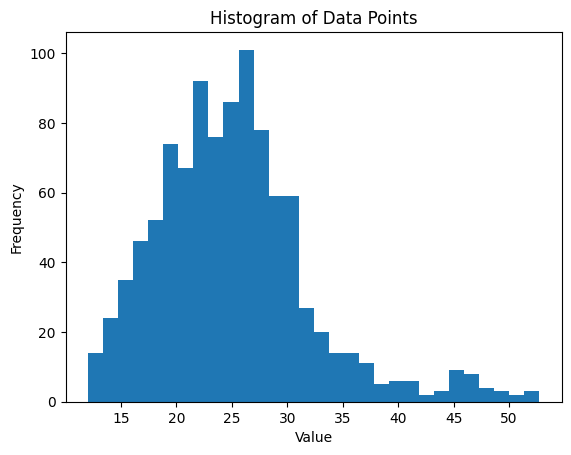

In [43]:
# prompt: Plot histogram for data points

import matplotlib.pyplot as plt

# Assuming 'data_points' is already defined from the previous code

plt.hist(data_points, bins=30)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data Points')
plt.show()


# Plots

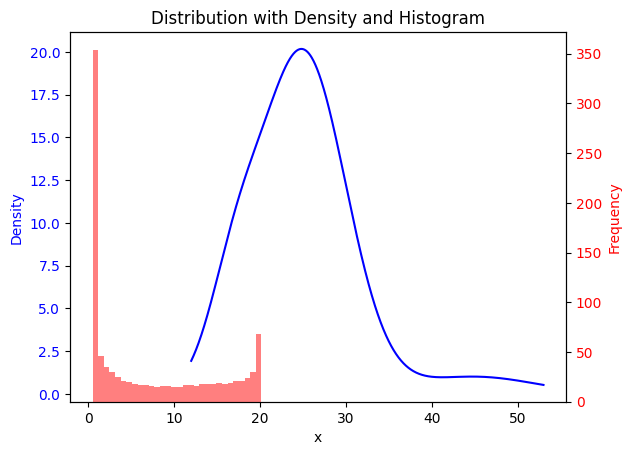

In [36]:
# Assuming 'distribution' is your data
x_range = (12, 53)
n_data = 1000
x = np.linspace(x_range[0], x_range[1], n_data)

fig, ax1 = plt.subplots()

# Plot the density on the y1-axis
ax1.plot(x, distribution, color='blue')
ax1.set_xlabel('x')
ax1.set_ylabel('Density', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Create a second y-axis for the histogram
ax2 = ax1.twinx()

# Plot the histogram on the y2-axis
ax2.hist(distribution, bins=30, color='red', alpha=0.5)  # Adjust bins as needed
ax2.set_ylabel('Frequency', color='red')
ax2.tick_params('y', labelcolor='red')

plt.title('Distribution with Density and Histogram')
plt.show()

In [37]:
distribution

array([ 1.92772507,  1.97102467,  2.01500572,  2.05967036,  2.10502049,
        2.15105775,  2.19778352,  2.24519894,  2.29330488,  2.34210191,
        2.39159036,  2.44177028,  2.49264142,  2.54420324,  2.59645494,
        2.64939539,  2.70302318,  2.75733662,  2.81233367,  2.86801203,
        2.92436907,  2.98140185,  3.03910712,  3.09748133,  3.1565206 ,
        3.21622074,  3.27657725,  3.3375853 ,  3.39923975,  3.46153515,
        3.52446573,  3.5880254 ,  3.65220776,  3.71700611,  3.78241341,
        3.84842235,  3.91502527,  3.98221424,  4.04998101,  4.11831706,
        4.18721354,  4.25666134,  4.32665105,  4.39717298,  4.46821717,
        4.53977339,  4.61183114,  4.68437966,  4.75740795,  4.83090476,
        4.90485859,  4.97925772,  5.0540902 ,  5.12934387,  5.20500637,
        5.2810651 ,  5.35750732,  5.43432008,  5.51149026,  5.58900458,
        5.6668496 ,  5.74501174,  5.82347729,  5.9022324 ,  5.98126314,
        6.06055543,  6.14009514,  6.21986804,  6.29985983,  6.38

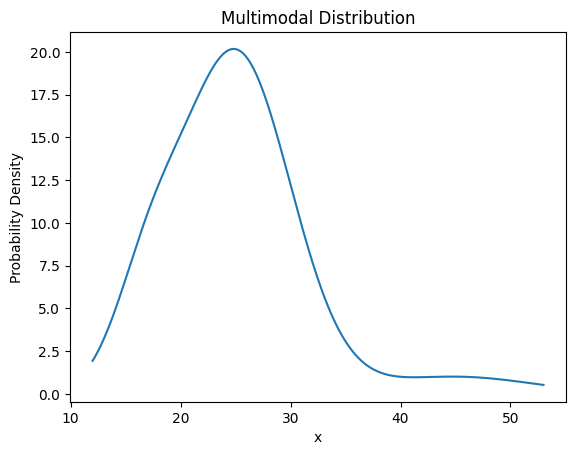

In [35]:
# Plot distribution
## Includes density distribution in y1-axis and histogram in y2-axis
plt.figure(figsize=(12, 6))


#plt.plot(np.linspace(x_range[0], x_range[1], n_data), distribution)
#plt.title('Multimodal Distribution')
#plt.xlabel('x')
#plt.ylabel('Probability Density')
#plt.show()




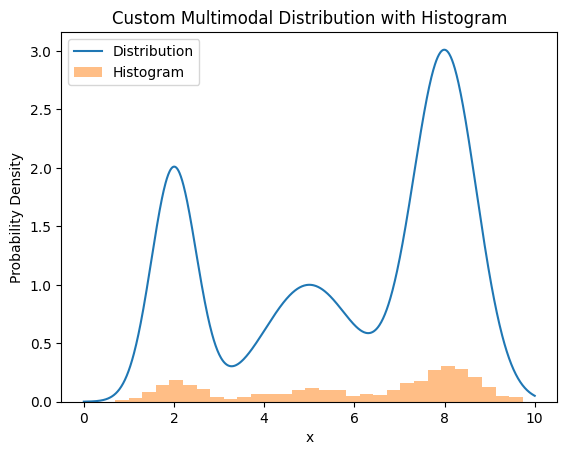

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def multimodal_distribution(x_range, mode_locations, intensities, std_devs=[1, 1]):
    """
    Generates a multimodal distribution by combining normal distributions.

    Args:
        x_range (tuple): Range of x-values for the distribution (min, max).
        mode_locations (list): Locations of each mode.
        intensities (list): Intensities of each mode.
        std_devs (list, optional): Standard deviations of each mode. Defaults to [1, 1].

    Returns:
        numpy.ndarray: The generated distribution.
    """

    x = np.linspace(x_range[0], x_range[1], 1000)
    distribution = np.zeros_like(x, dtype=float)

    for i in range(len(mode_locations)):
        # Generate normal distribution for the current mode
        mode_location = mode_locations[i]
        mode_distribution = intensities[i] * np.exp(-0.5 * ((x - mode_location) / std_devs[i])**2)

        # Add to the overall distribution
        distribution += mode_distribution

    return distribution

def generate_data_points(distribution, x_range, num_points):
    """
    Generates data points based on the given distribution.

    Args:
        distribution (numpy.ndarray): The probability distribution.
        x_range (tuple): Range of x-values for the distribution (min, max).
        num_points (int): Number of data points to generate.

    Returns:
        numpy.ndarray: The generated data points.
    """

    x = np.linspace(x_range[0], x_range[1], 1000)
    cdf = np.cumsum(distribution)  # Calculate cumulative distribution function
    cdf /= cdf[-1]  # Normalize CDF to range [0, 1]

    random_numbers = np.random.rand(num_points)
    data_points = np.interp(random_numbers, cdf, x)  # Inverse transform sampling

    return data_points

# Example usage with custom values:
x_range = (0, 10)
mode_locations = [2, 5, 8]  # User-defined mode locations
intensities = [2, 1, 3]
std_devs = [0.5, 1, 0.7]
custom_distribution = multimodal_distribution(x_range, mode_locations, intensities, std_devs)

# Generate data points
num_points = 1000
data_points = generate_data_points(custom_distribution, x_range, num_points)

# Plotting the distribution and histogram
plt.plot(np.linspace(x_range[0], x_range[1], 1000), custom_distribution, label='Distribution')
plt.hist(data_points, bins=30, density=True, alpha=0.5, label='Histogram')
plt.title('Custom Multimodal Distribution with Histogram')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Saving the data points
np.savetxt('data_points.txt', data_points)